In [10]:
numbers_file = './Table_S4.csv'

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib import text as mtext
import math
from common_functions import CurvedText, make_figure_set_width


In [11]:
## linearly interpolate along a given curve of x,y points
def interpolate_curve(new_x,x, y):
    il = np.where(new_x >= x)[0][-1]
    ir = np.where(new_x <= x)[0][0]
    
    yl = y[il]
    yr = y[ir]
    new_y = yl + (yr-yl)*(new_x-x[il])/(x[ir]-x[il])
    return new_y
    



In [12]:
# load in data from table s4
data = pd.read_csv(numbers_file)

# Values used
N = 2e4
k = 4/1.89
n = 1
u = 1.25e-8

# transform target size estimates to variance estimates
data['estimated_variance'] = data['Estimated target size (L)']*2*N*u*4/k/n
data['estimated_variance_low'] = data['Lower bound on L']*2*N*u*4/k/n
data['estimated_variance_high'] = data['Upper bound on L']*2*N*u*4/k/n


In [13]:
# Put everything in an array for easy plotting
var = np.array(data['estimated_variance'])
var_low = np.array(data['estimated_variance_low'])
var_high = np.array(data['estimated_variance_high'])
type_vector = np.array(data['Trait type'])
order = np.argsort(var)

# find index of standing height
height_index = 0
for i,n in enumerate(data['Trait']):
    if n == 'Standing height':
        height_index = i
        break
height_order = np.argwhere(order==height_index)[0][0]
print(height_order)

# Define colors and markers for each trait type
def type_color(t):
    if t == 'Morphometric':
        color = '#1E88E5'
    elif t == 'Blood':
        color = '#D81B60'
    elif t == 'Cardiovascular':
        color = '#004D40'
    elif t == 'Behavioral':
        color = '#6005A0'
    elif t == 'ophthalmologic':
        color = '#FFC107'
    elif t == 'Molecular':
        color = 'k'
    else:
        raise ValueError
    return color
        

def type_marker(t):
    if t == 'Morphometric':
        marker = '^'
    elif t == 'Blood':
        marker = '.'
    elif t == 'Cardiovascular':
        marker = '+'
    elif t == 'Behavioral':
        marker = 'o'
    elif t == 'ophthalmologic':
        marker = 'v'
    elif t == 'Molecular':
        marker = '*'
    else:
        raise ValueError
    marker = '.'
    return marker


58


In [14]:
def make_figure_S15(fig_height,fig_width):
    fig = plt.figure(dpi=400,figsize=(fig_width,fig_height))
    ax = plt.gca()
    ax.set_ylabel(r'Estimated genetic variance (units of $\delta^2$)')
    axtwin = ax.twinx()
    
    # maximum variance that allows for large effect fixations
    max_var = 300

    # create arrays for each type of trait
    for t in np.unique(type_vector):
        x = []
        y = []
        y_err_high = []
        y_err_low = []
        for i,v,h,l,tt in zip(np.sort(order),var[order],var_high[order],var_low[order],type_vector[order]):
            if tt != t:
                continue
            else:
                x.append(i+1)
                y.append(v)
                y_err_high.append((h-v))
                y_err_low.append((v-l))
                
        ax.errorbar(x,y,yerr=[y_err_low,y_err_high],color=type_color(t),alpha=1,ls='',marker=type_marker(t),markersize=3)
        axtwin.errorbar(x,np.array(y)/max_var,yerr=[np.array(y_err_low)/max_var,np.array(y_err_high)/max_var],color=type_color(t),ls='',marker='.',alpha=0)

    # print maximimal pleiotropy values for first and median trait
    j = 0
    for i,v,h,l,tt in zip(np.sort(order),var[order],var_high[order],var_low[order],type_vector[order]):
        if j == 0:
            print(r'For the trait with the smallest variance, $n_e=$',v/max_var)
        elif j == 46:
            print(r'For the median trait, $n_e=$',v/max_var)
        j += 1
        
    # annotate standing height
    dx = -8
    x = height_order+1-dx
    dy = var_low[height_index]*0.8
    y = var_low[height_index]/5
    ax.annotate("Standing\n"+"height",xytext=(x,y),xy=(x+dx,y+dy),arrowprops=dict(arrowstyle="->"),ha='center',va='center')
    
    # set scales and limits
    ax.set_yscale('log')
    axtwin.set_yscale('log')
    axtwin.set_ylabel('Maximal degree of pleiotropy for large effect fixations')
    ax.set_xlabel('Trait index (ranked by estimated variance)')
    ax.set_xlim([0,96])
    y_lim = 1.5e6
    ax.set_ylim([max_var,y_lim])
    axtwin.set_ylim([1,y_lim/max_var])

    # create legend
    for t in np.unique(type_vector):
        
        ax.errorbar([],[],[],color=type_color(t),ls = '', marker = '.',alpha = 1, markersize = 3,label = t.capitalize())

    ax.legend(handlelength = 1, handletextpad = 0.5, framealpha =1, edgecolor = 'k')
    
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width_inches, height_inches = bbox.width, bbox.height
    return fig, fig_width, fig_height, width_inches, height_inches
    

For the trait with the smallest variance, $n_e=$ 3.53155113045
For the median trait, $n_e=$ 45.12747673349999


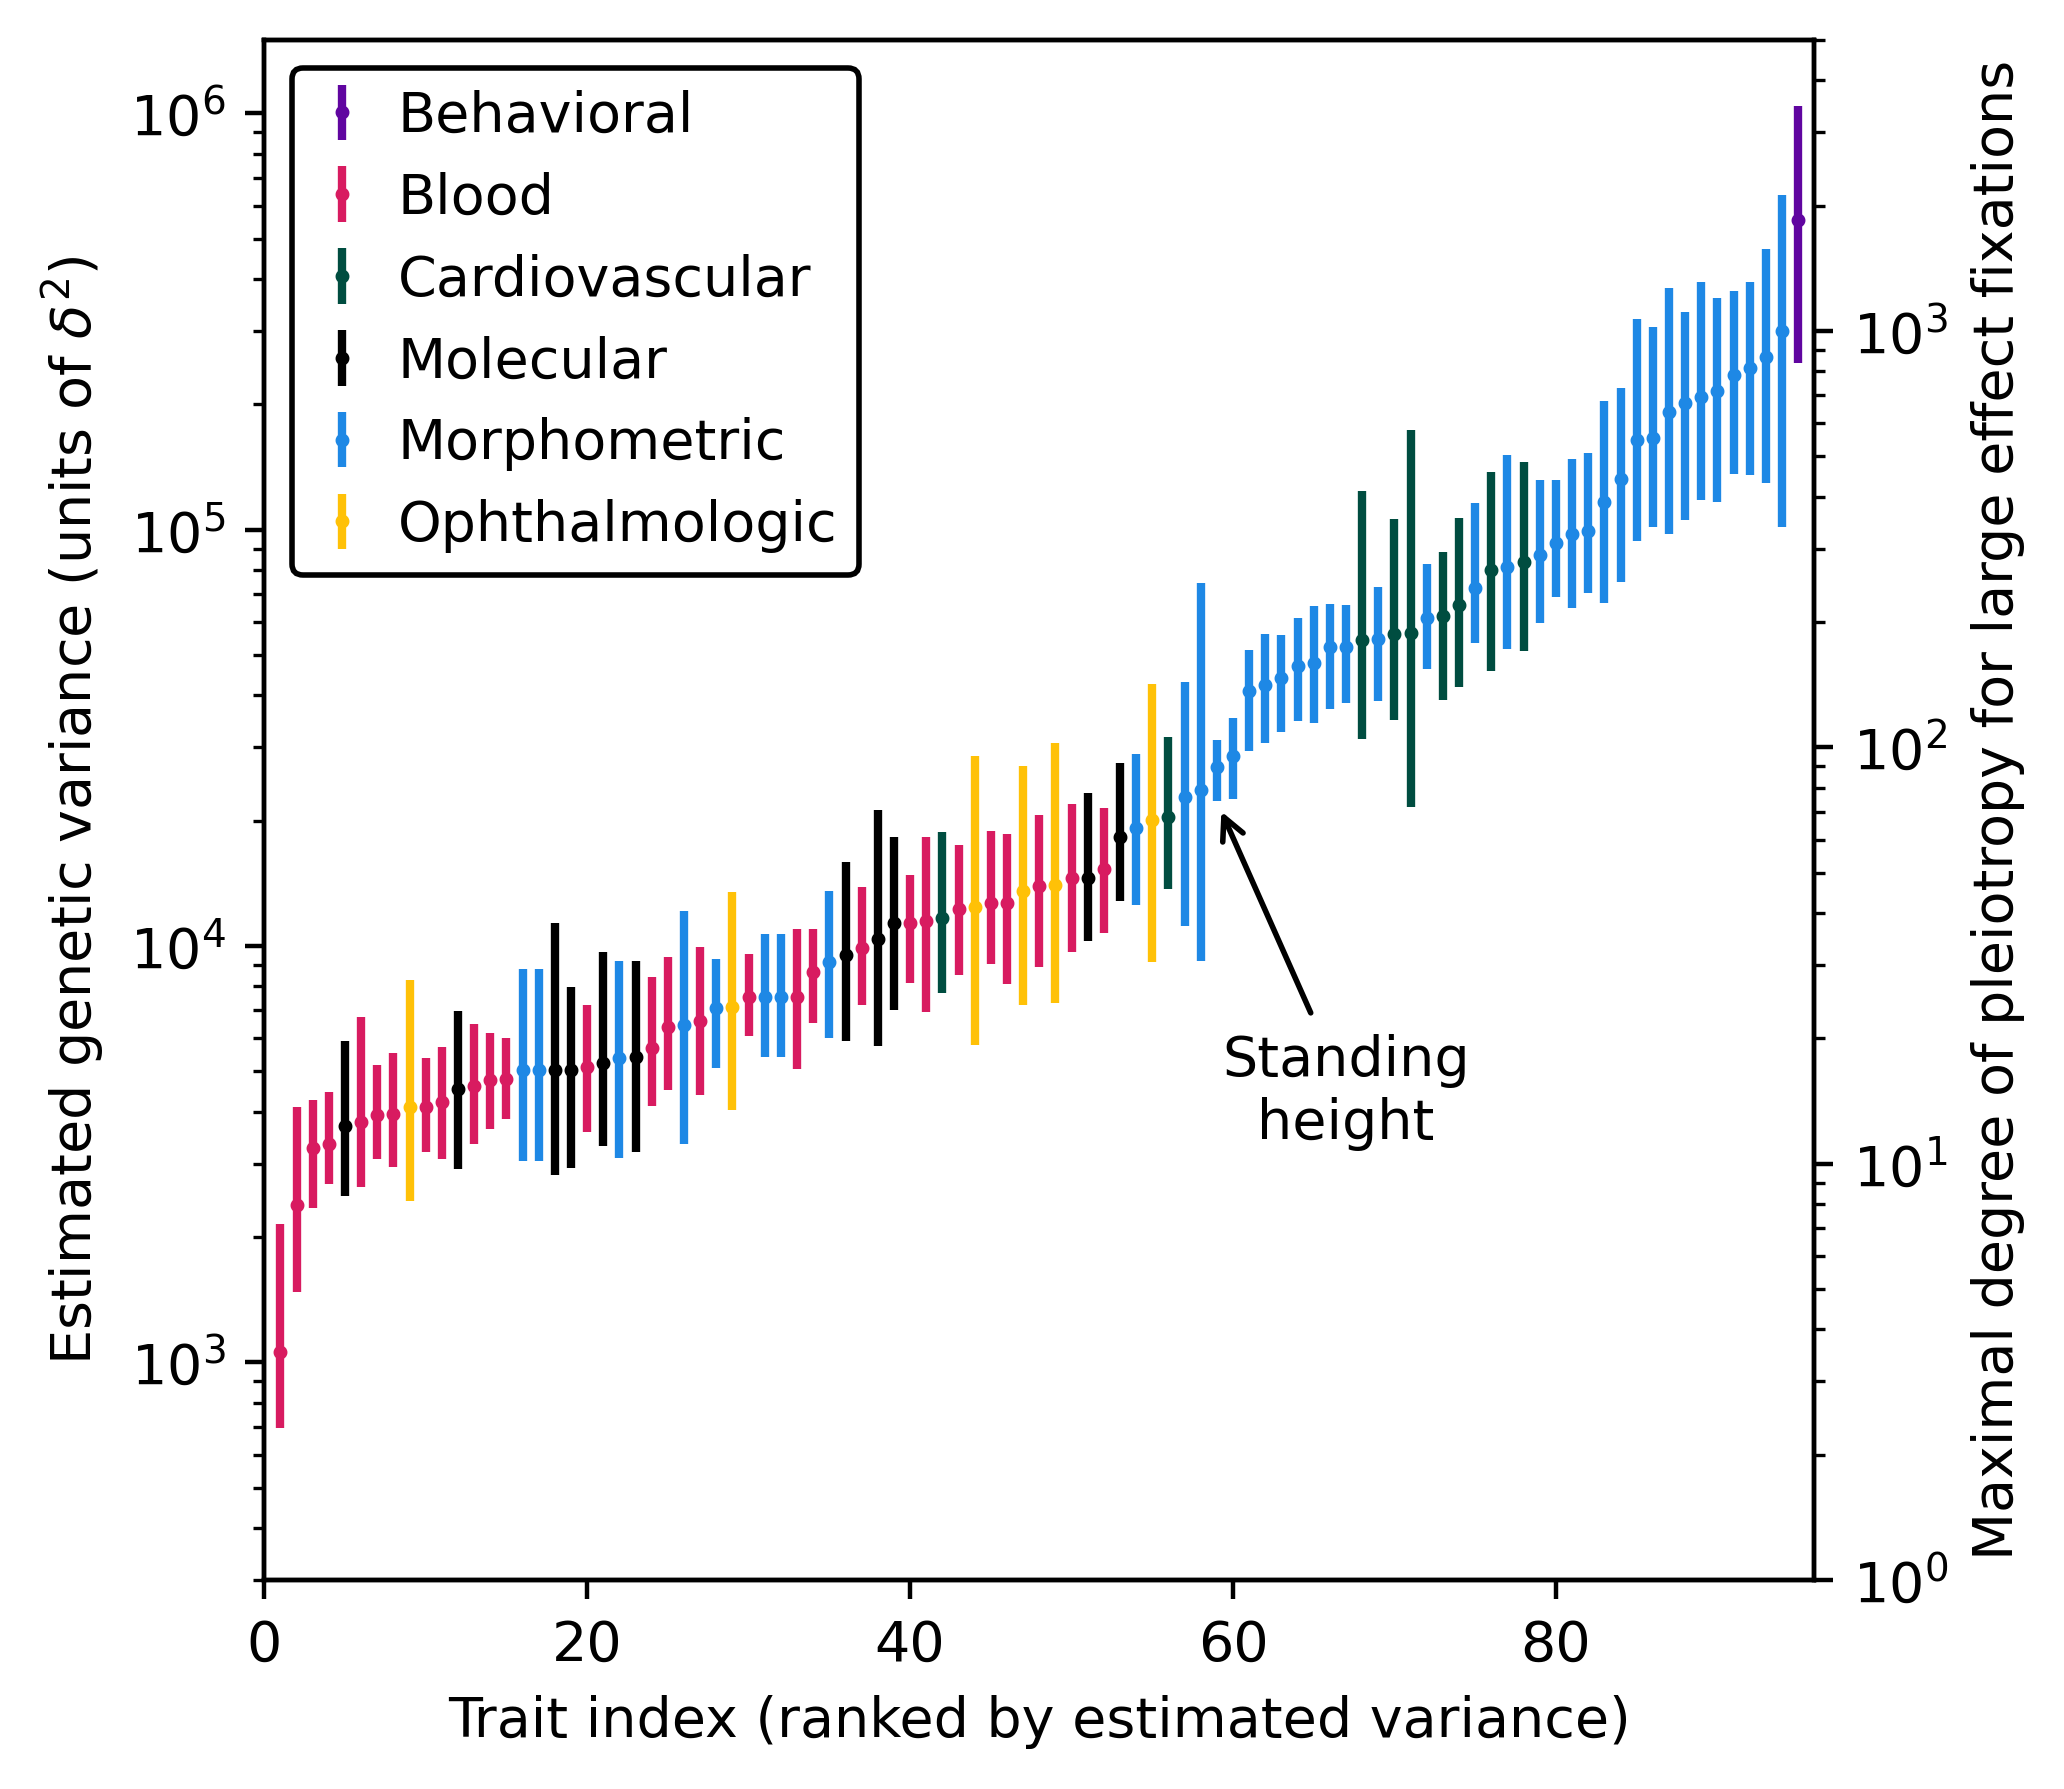

In [ ]:
make_figure_set_width(fig_function=make_figure_S15, filename='./Figures/Figure_S15.png', target_width_inches=5.0, fig_height=5,fig_width=5)
